In [1]:
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10, MNIST
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1, 2'
torch.backends.cudnn.benchmark = True

# CIFAR 10 
Use ACGD to train GAN with the simpliest loss without regularization
$$\min_{G \in \mathcal{G}} \max_{D\in \mathcal{D}} \mathbb{E}_{x\sim P_r}D(x) - \mathbb{E}_{x\sim P_g} D(x)$$


cuda:0
Files already downloaded and verified
learning rate: 0.00010 
weight decay: 0.00000
l2 penalty on discriminator: 0.00000
l2 penalty on generator: 0.00000
gradient penalty weight: 0.00
Iter : 0, Loss: -0.00026, time: 6.398s
Iter : 500, Loss: 0.17066, time: 51.102s
Iter : 1000, Loss: -0.90816, time: 52.445s
Iter : 1500, Loss: -0.68047, time: 51.408s
Iter : 2000, Loss: -0.02085, time: 55.479s
Iter : 2500, Loss: -0.31033, time: 58.807s
Iter : 3000, Loss: -0.61705, time: 59.572s
Iter : 3500, Loss: 0.03038, time: 59.885s
Iter : 4000, Loss: -1.11158, time: 62.355s
Iter : 4500, Loss: -1.78837, time: 60.678s
inception score- mean: 2.1720570922559324, std: 0.021227924442342092
Iter : 5000, Loss: -2.07355, time: 107.298s
Iter : 5500, Loss: -1.94344, time: 65.894s
Iter : 6000, Loss: -2.05305, time: 63.155s
Iter : 6500, Loss: -2.88582, time: 65.131s
Iter : 7000, Loss: -2.55995, time: 64.488s
Iter : 7500, Loss: -1.10129, time: 65.838s
Iter : 8000, Loss: -1.62265, time: 65.214s
Iter : 8500, Lo

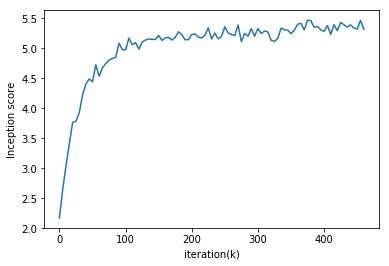

In [2]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
learning_rate = 0.0001
batch_size = 64
z_dim = 128
dropout = None
# Dropout: None or 0.5
if dropout is not None:
    print('dropout!')
    D = GoodDiscriminatord(dropout=dropout)
else:
    D = GoodDiscriminator()
G = GoodGenerator()
dataset = CIFAR10(root='datas/cifar10', download=True, train=True, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
]))
trainer = VisionData(D=D, G=G, device=device, dataset=dataset, z_dim=z_dim, batchsize=batch_size, 
                      lr=learning_rate, show_iter=500, weight_decay=0.0, d_penalty=0.0, g_penalty=0, 
                      noise_shape=(64, z_dim), gp_weight=0, gpu_num=2)
trainer.train_bcgd(epoch_num=600, mode='ACGD', collect_info=False, dataname='CIFAR10-WGAN', 
                   logname='CIFAR10-WGAN', loss_type='WGAN')
# loss_type : WGAN, JSD

![iter 468500](https://i.imgur.com/sH9dHjD.png) 
<div align="center">Generated images - 468500 iter</div>

## WGAN-GP
$$\min_{G \in \mathcal{G}} \max_{D\in \mathcal{D}} \mathbb{E}_{x\sim \mathbb{P}_r}[D(x)] - \mathbb{E}_{x\sim \mathbb{P}_g} [D(x)] + \lambda \cdot (\|\frac{\partial D(\hat x)}{\partial \hat x}\|-1)^2$$

where $\hat x = \alpha x_r + (1-\alpha) x_g, \alpha \sim U(0,1)$.

In [4]:
from wgan_gp import WGAN_GP
trainer = WGAN_GP(D=D, G=G, device=device, dataset=dataset, z_dim=z_dim, batchsize=batch_size, lr=learning_rate,
                      show_iter=500, gp_weight=10, d_penalty=0.0, d_iter=5, noise_shape=(64, z_dim))
trainer.train_epoch(epoch_num=3000, dirname='WGAN-GP', dataname='CIFAR10', gp=True, d_penalty=None)

learning rate: 0.00010 
l2 penalty on discriminator: 0.00000
gradient penalty weight: 10.000
Iter: 0, D loss: 8.57530, Gradient penalty: 8.49693 
Iter: 0, G loss: -3842.47559 
time cost: 0.17
inception score mean: 1.0564283381014374, std: 0.0007409266426314067
Iter: 500, D loss: -15.27968, Gradient penalty: 4.65440 
Iter: 500, G loss: -3894.60938 
time cost: 56.29
Iter: 1000, D loss: -14.94124, Gradient penalty: 2.36589 
Iter: 1000, G loss: -3860.86475 
time cost: 14.37
Iter: 1500, D loss: -8.92031, Gradient penalty: 1.60556 
Iter: 1500, G loss: -3818.33838 
time cost: 14.48
Iter: 2000, D loss: -7.65568, Gradient penalty: 1.66390 
Iter: 2000, G loss: -3725.21289 
time cost: 15.35
Iter: 2500, D loss: -4.02524, Gradient penalty: 0.64444 
Iter: 2500, G loss: -3736.33105 
time cost: 16.06
Iter: 3000, D loss: -3.05395, Gradient penalty: 0.22047 
Iter: 3000, G loss: -3761.67139 
time cost: 15.11
Iter: 3500, D loss: -2.77818, Gradient penalty: 0.14272 
Iter: 3500, G loss: -3685.11719 
time co